In [1]:
import numpy as np
import pandas as pd
import scipy

In [2]:
from ecoevocrm.consumer_resource_system import *
from ecoevocrm.consumer_resource_system import *
import ecoevocrm.utils as utils
import ecoevocrm.viz as viz
import ecoevocrm.coarse_graining as cg
import ecoevocrm.strain_pool

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

----

## Model parameters

### Traits

In [4]:
L = 10

In [5]:
sigma = utils.binary_combinations(L, exclude_all_zeros=True)
sigma = sigma/sigma.sum(axis=1, keepdims=1)

### Costs

In [6]:
chi = 0.5

In [7]:
xi = 0.1

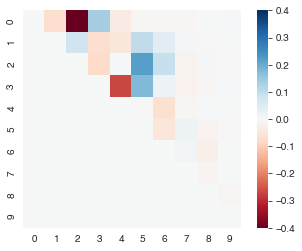

In [8]:
J = utils.random_matrix((L, L), 'tikhonov_sigmoid', args={'n_star': 5, 'delta': 1}, triangular=True, diagonal=0)
viz.matrix_plot(J, vmin=-0.4, vmax=0.4)

### Environment

In [28]:
T_total    = 1e6
T_envcycle = T_total/10
dt_env     = 1
t_rho      = np.arange(0, T_total, step=dt_env)

In [29]:
rho = 1

In [30]:
alpha = 0.1

theta = (2*np.pi)/T_envcycle
theta = np.random.normal(theta, theta*0.05, size=L)

phi   = (T_envcycle/L)*np.array(range(L))
phi   = phi + np.random.normal(0, 0.05*phi)

In [31]:
rho_series = []
for i in range(L):
    rho_i = rho + (alpha * np.sin(theta[i] * (t_rho + phi[i])))
    rho_series.append(rho_i)
rho_series = np.array(rho_series)

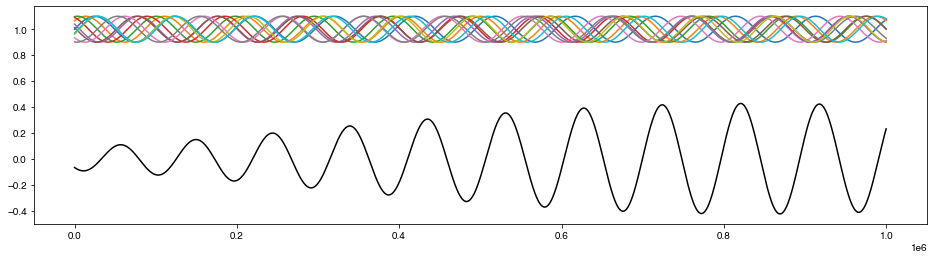

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
for i in range(L):
    ax.plot(t_rho, rho_series[i]) 
ax.plot(t_rho, L - rho_series.sum(axis=0), color='k')
plt.show()

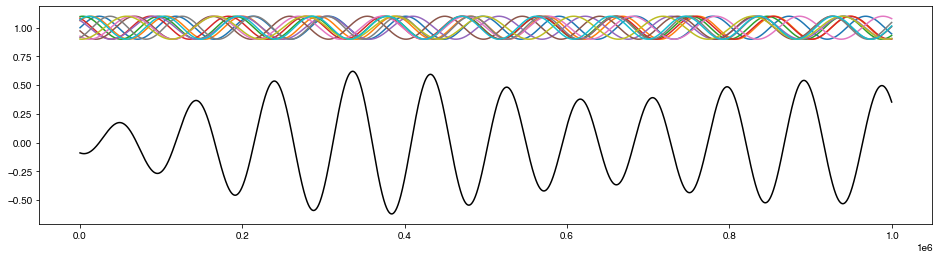

In [12]:
t = np.arange(0, T_total, 1)
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
y_sum = np.zeros_like(t)
for i in range(L):
    y = 1 + (alpha * np.sin(theta[i] * (t + phi[i])))
    ax.plot(t, y) 
    y_sum += y
ax.plot(t, L - y_sum, color='k')
plt.show()

## Simulate model

In [13]:
system = ConsumerResourceSystem(type_set=TypeSet(sigma=sigma[0], xi=xi, chi=chi, J=J, binarize_traits_J_cost_terms=True, mu=1e-10), 
                                resource_set=ResourceSet(num_resources=L, rho=rho, alpha=alpha, theta=theta, phi=phi), 
                                N_init=1, R_init=1, convergent_lineages=False)

In [14]:
system.run(T=T_total)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[[1. 1. 1. 1. 

<AxesSubplot:>

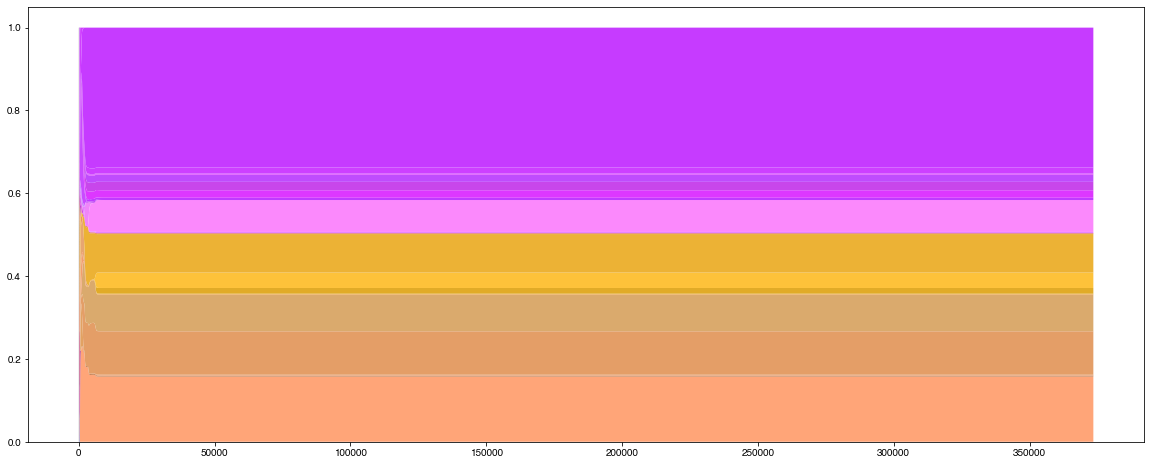

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
viz.stacked_abundance_plot(system, ax=ax, relative_abundance=True, apply_palette_depth=1, t_max=1e6, log_x_axis=False)

---------
---------

rand_cggroup: [0]
rand_cggroup: [0, 1]
rand_cggroup: [0, 1, 2]
rand_cggroup: [0, 1, 2, 3]
rand_cggroup: [0, 1, 2, 3, 4]
rand_cggroup: [0, 1, 2, 3, 4, 5]
rand_cggroup: [0, 1, 2, 3, 4, 5, 6]


KeyboardInterrupt: 

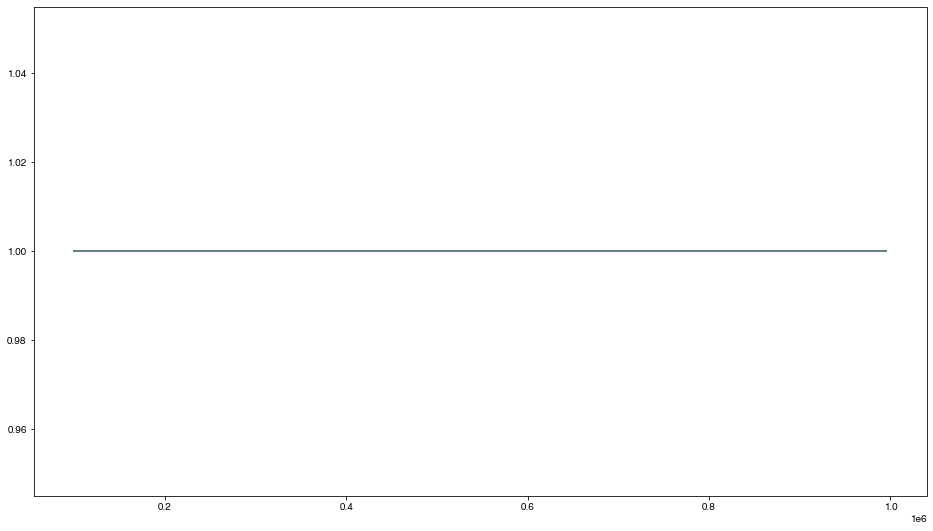

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(16, 9))

t0 = T_envcycle 
# t0 = get_max_diversity_t(system)

tf_vals = np.arange(0, T_total-t0, 5e3)

phylo_depths = range(1, L+1)
for d, phylo_depth in enumerate(phylo_depths):
    
    # rand_cggroup = trait_subsets[np.random.choice(range(len(trait_subsets)))]
    rand_cggroup = list(range(d+1))
    print("rand_cggroup:", rand_cggroup)
    traitgroup_persistences = []
    plot_tfs = []
    for i, tf in enumerate(tf_vals):
        if(t0+tf > T_total):
            break
        traitgroup_persistences.append( cg.functional_group_turnover(system, trait_subset=rand_cggroup, t0=t0, tf=t0+tf, inverse=True) )        
        plot_tfs.append(t0+tf)
    ax.plot(plot_tfs, traitgroup_persistences, label=f"trait cg{d+1}", color='tab:purple', alpha=1/len(rand_cggroup)**0.75)
    
    phylogroup_persistences = []
    plot_tfs = []
    for i, tf in enumerate(tf_vals):
        if(t0+tf > T_total):
            break
        phylogroup_persistences.append( cg.phylogenetic_group_turnover(system, phylogeny_depth=phylo_depth, t0=t0, tf=t0+tf, inverse=True) )
        plot_tfs.append(t0+tf)
    ax.plot(plot_tfs, phylogroup_persistences, label=f"phylo d{phylo_depth}", color='tab:green', alpha=1/(d+1))
        
# ax.axvline(T_envcycle, color='k', ls='--', lw=1, zorder=-1)
for j in range(int(T_total/T_envcycle)):
    ax.axvline(j*T_envcycle, color='k', alpha=0.5, ls='--', lw=1, zorder=-1)
    
ax.set_xscale('log')
ax.set_ylim(0, 1.02)
# ax.axhline(0)
ax.legend(ncol=2)
sns.despine()

--------
-------

---------
---------

In [ ]:
T  = 1e6
dt = 1
t_series = np.arange(0, T, step=dt)

In [ ]:
l   = 1e0
k   = 1e-5
eps = 5e-4

In [ ]:
x0   = 1
x    = np.zeros_like(t_series)
x[0] = x0

v0   = 0
v    = np.zeros_like(t_series)
v[0] = v0

In [ ]:
for t in range(len(t_series)-1):
    dv = -l*v[t] + np.random.normal(0, eps) - k*(x[t]-x[0])
    v[t+1] = v[t] + dv*dt
    dx = v[t+1]
    x[t+1] = x[t] + dx*dt

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))
ax.plot(t_series, v, alpha=0.2, label='v')
ax.plot(t_series, x, label='x')
ax.legend()
ax.set_ylim(0, 2)
ax.axhline(x[0], color='k', alpha=1, ls='-')
ax.axhline(0.9, color='darkblue', alpha=0.5, ls=':')
ax.axhline(1.1, color='darkblue', alpha=0.5, ls=':')
ax.axhline(x[0]+np.std(x), color='k', alpha=0.3, ls='--')
ax.axhline(x[0]-np.std(x), color='k', alpha=0.3, ls='--')
ax.axhline(x[0]+2*np.std(x), color='k', alpha=0.2, ls='--')
ax.axhline(x[0]-2*np.std(x), color='k', alpha=0.2, ls='--')
ax.axhline(x[0]+3*np.std(x), color='k', alpha=0.1, ls=':')
ax.axhline(x[0]-3*np.std(x), color='k', alpha=0.1, ls=':')

In [ ]:
T  = 1e6
dt = 1000
t_series = np.arange(0, T, step=dt)

In [ ]:
l   = 1e-3
k   = 1e-8
eps = 1e-8

In [ ]:
x0   = 1
x    = np.zeros_like(t_series)
x[0] = x0

v0   = 0
v    = np.zeros_like(t_series)
v[0] = v0

In [ ]:
for t in range(len(t_series)-1):
    dv = -l*v[t] + np.random.normal(0, eps) - k*(x[t]-x[0])
    v[t+1] = v[t] + dv*dt
    dx = v[t+1]
    x[t+1] = x[t] + dx*dt

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))
ax.plot(t_series, v, alpha=0.2, label='v')
ax.plot(t_series, x, label='x')
ax.legend()
ax.set_ylim(0, 2)
ax.axhline(x[0], color='k', alpha=1, ls='-')
ax.axhline(0.9, color='darkblue', alpha=0.5, ls=':')
ax.axhline(1.1, color='darkblue', alpha=0.5, ls=':')
ax.axhline(x[0]+np.std(x), color='k', alpha=0.3, ls='--')
ax.axhline(x[0]-np.std(x), color='k', alpha=0.3, ls='--')
ax.axhline(x[0]+2*np.std(x), color='k', alpha=0.2, ls='--')
ax.axhline(x[0]-2*np.std(x), color='k', alpha=0.2, ls='--')
ax.axhline(x[0]+3*np.std(x), color='k', alpha=0.1, ls=':')
ax.axhline(x[0]-3*np.std(x), color='k', alpha=0.1, ls=':')

In [ ]:
T  = 1e6
dt = 1000
t_series = np.arange(0, T, step=dt)

In [ ]:
l   = 1e-3
k   = 1e-8
eps = 1e-8

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

ax.axhline(0.9, color='k', alpha=0.4, ls=':')
ax.axhline(1.1, color='k', alpha=0.4, ls=':')

for i in range(L):
    print(i+1)
    
    x0   = 1
    x    = np.zeros_like(t_series)
    x[0] = x0

    v0   = 0
    v    = np.zeros_like(t_series)
    v[0] = v0

    for t in range(len(t_series)-1):
        dv = -l*v[t] + np.random.normal(0, eps) - k*(x[t]-x[0])
        v[t+1] = v[t] + dv*dt
        dx = v[t+1]
        x[t+1] = x[t] + dx*dt
        
    ax.plot(t_series, x, label=f"x{i+1}")
    
    ax.axhline(x[0]+2*np.std(x), color='k', alpha=0.2, ls='--')
    ax.axhline(x[0]-2*np.std(x), color='k', alpha=0.2, ls='--')

ax.legend()
ax.set_ylim(0, 2)

In [ ]:
print(x[69], x[70])

In [ ]:
print(t_series[69], t_series[70])

In [ ]:
np.interp(69900, t_series, x) 

In [ ]:
T  = 1e6
dt = 1
t_series = np.arange(0, T, step=dt)

In [ ]:
l   = 1e-3
k   = 1e-8
eps = 1e-8

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

ax.axhline(0.9, color='k', alpha=0.4, ls=':')
ax.axhline(1.1, color='k', alpha=0.4, ls=':')

for i in range(L):
    print(i+1)
    
    x0   = 1
    x    = np.zeros_like(t_series)
    x[0] = x0

    v0   = 0
    v    = np.zeros_like(t_series)
    v[0] = v0

    for t in range(len(t_series)-1):
        dv = -l*v[t] + np.random.normal(0, eps) - k*(x[t]-x[0])
        v[t+1] = v[t] + dv*dt
        dx = v[t+1]
        x[t+1] = x[t] + dx*dt
        
    ax.plot(t_series, x, label=f"x{i+1}")
    
    ax.axhline(x[0]+2*np.std(x), color='k', alpha=0.2, ls='--')
    ax.axhline(x[0]-2*np.std(x), color='k', alpha=0.2, ls='--')

ax.legend()
ax.set_ylim(0, 2)